In [13]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [14]:
organ_names = [
    "gallbladder",
    "stomach",
    "esophagus",
    "right kidney",
    "right adrenal gland",
    "left adrenal gland",
    "liver",
    "left kidney",
    "aorta",
    "spleen",
    "inferior vena cava",
    "pancreas",
]

In [15]:
# ============================
# 1. Load All JSON Files
# ============================

files = {
    "Default-CE+Dice": "Default_CEDice_summary.json",
    "Default-Focal+Dice": "Default_FocalDice_summary.json",
    "DA5-CE+Dice": "DA5_CEDice_summary.json",
    "DA5-Focal+Dice": "DA5_FocalDice_summary.json",
    "NoMirroring-CE+Dice": "NoMirroring_CEDice_summary.json",
    "NoMirroring-Focal+Dice": "NoMirroring_FocalDice_summary.json"
}

results = {}

for name, path in files.items():
    with open(path, "r") as f:
        results[name] = json.load(f)

# ============================
# 2. Extract Mean DSC per Setting
# ============================

mean_dsc = {}

for name, res in results.items():
    mean_dsc[name] = res["foreground_mean"]["Dice"]

mean_dsc_df = pd.DataFrame.from_dict(mean_dsc, orient="index", columns=["Mean_DSC"])
mean_dsc_df


,Mean_DSC
Default-CE+Dice,0.931562
Default-Focal+Dice,0.928526
DA5-CE+Dice,0.929306
DA5-Focal+Dice,0.926867
NoMirroring-CE+Dice,0.953023
NoMirroring-Focal+Dice,0.951523


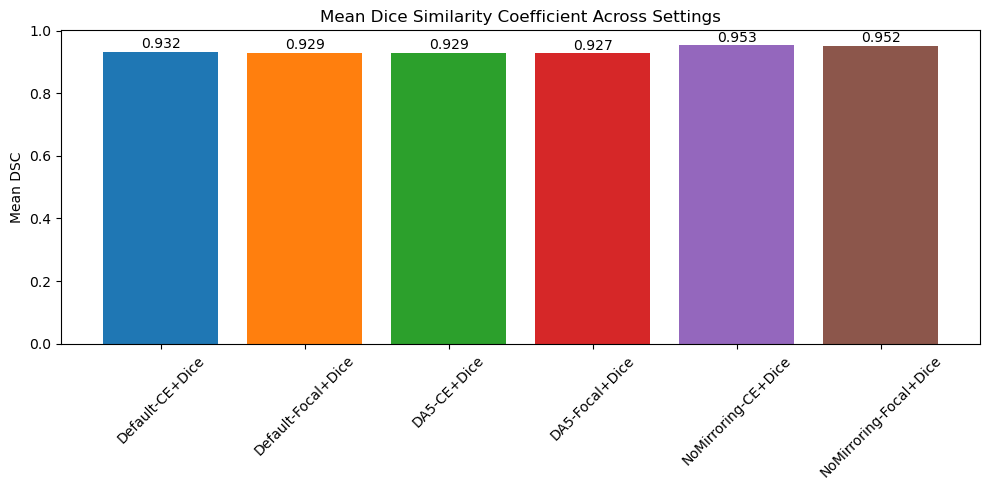

In [23]:
# -------------------------
# Shared color palette (ALIGNED across plots)
# -------------------------
colors = plt.cm.tab10.colors  # up to 10 consistent colors
color_map = {setting: colors[i % len(colors)] for i, setting in enumerate(results.keys())}

# -------------------------
# Plot 1 — Mean DSC Comparison WITH VALUE LABELS
# -------------------------
plt.figure(figsize=(10, 5))

bars = plt.bar(mean_dsc.keys(), mean_dsc.values(), 
               color=[color_map[k] for k in mean_dsc.keys()])

plt.ylabel("Mean DSC")
plt.title("Mean Dice Similarity Coefficient Across Settings")
plt.xticks(rotation=45)
plt.tight_layout()

# ---- Add Value Labels ----
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.002,             # small offset above bar
        f"{height:.3f}",
        ha='center',
        va='bottom',
        fontsize=10
    )

# Save high-resolution PNG
plt.savefig("mean_dsc_comparison.png", dpi=600)

plt.show()


In [17]:
# Collect all organ IDs (as strings)
all_organs = list(results["Default-CE+Dice"]["mean"].keys())

# Try to sort numerically when possible, otherwise sort alphabetically
try:
    all_organs = sorted(all_organs, key=lambda x: int(x))
except:
    all_organs = sorted(all_organs)

# Build DataFrame: rows = organs, columns = settings
organ_dsc_df = pd.DataFrame(index=all_organs)

for name, res in results.items():
    organ_dsc_df[name] = [res["mean"][org]["Dice"] for org in all_organs]

organ_dsc_df


,Default-CE+Dice,Default-Focal+Dice,DA5-CE+Dice,DA5-Focal+Dice,NoMirroring-CE+Dice,NoMirroring-Focal+Dice
1,0.927020,0.925009,0.925560,0.922313,0.951000,0.949627
2,0.968031,0.963325,0.967347,0.963411,0.975201,0.970534
3,0.909145,0.907564,0.906254,0.906178,0.936950,0.937953
4,0.968945,0.965339,0.967758,0.964221,0.972792,0.969480
5,0.831742,0.838825,0.827298,0.832853,0.901250,0.909349
6,0.845850,0.845609,0.838363,0.842605,0.906828,0.912045
7,0.982003,0.977730,0.981780,0.977145,0.985381,0.981750
8,0.968905,0.964690,0.967964,0.963736,0.972182,0.968675
9,0.956806,0.952217,0.954996,0.951013,0.964950,0.962077
10,0.978495,0.975812,0.978019,0.975449,0.980860,0.978212


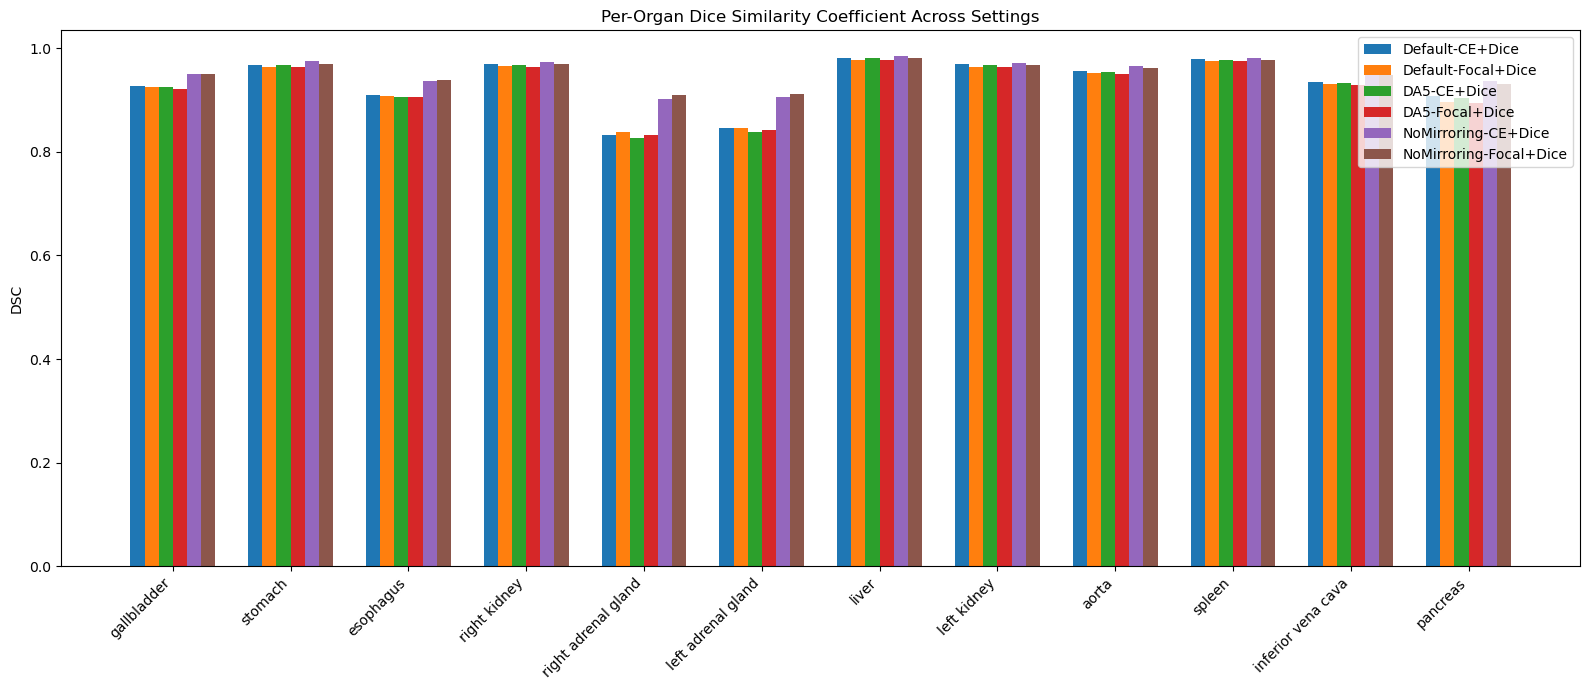

In [25]:
# -------------------------
# Plot 2 — Organ-Level DSC (Grouped Bar Chart)
# -------------------------
plt.figure(figsize=(16, 7))

x = range(len(organ_names))
width = 0.12  # small width for 6 groups

for i, setting in enumerate(organ_dsc_df.columns):
    plt.bar(
        [p + i*width for p in x],
        organ_dsc_df[setting],
        width=width,
        label=setting,
        color=color_map[setting]
    )

plt.xticks([p + width*2.5 for p in x], organ_names, rotation=45, ha="right")
plt.ylabel("DSC")
plt.title("Per-Organ Dice Similarity Coefficient Across Settings")
plt.legend()
plt.tight_layout()

# Save high-resolution PNG
plt.savefig("organ_dsc_comparison.png", dpi=600)
plt.show()